### Reading, understanding and visualizing data


In [1359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re 

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [1360]:
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1361]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1362]:
house.shape

(1460, 81)

In [1363]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Separate categorical and numeric columns

In [1364]:
house_category = pd.DataFrame()
house_numeric = pd.DataFrame()

for i in house.columns:
    if(house[i].dtypes == "object" or i in ["MSSubClass", "OverallQual", "OverallCond"]):
        house_category[i] = house[i]
        #print(i)
    else:
        house_numeric[i] = house[i]
        #   print("numeric = " , i)

In [1365]:
house_category.shape

(1460, 46)

In [1366]:
house_numeric.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1367]:
# Find columns where more than half of the values are zero, 
for i in house_numeric.columns:
    if ((house_numeric[i] == 0).sum() > len(house_numeric)/2):
        print(i)
   

MasVnrArea
BsmtFinSF2
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
HalfBath
WoodDeckSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal


In [1368]:
#Following coulmns have majority of values as 0 in numeric columns of dataset and hence they can be removed

for i in house_numeric.columns:
    if ((house_numeric[i] == 0).sum() > len(house_numeric)/2):
        house_numeric = house_numeric.drop([i], axis=1)
        
house_numeric.shape        

(1460, 22)

In [1369]:
house_numeric = house_numeric.drop(["Id"], axis=1)

#### Analyzing categorical columns


In [1370]:
# This columns have NA values, which is actually a type of categorical value. Fill it with some keyword rather than NA
for i in house_category.columns:
    house_category[i] = house_category[i].fillna("No_"+i)


In [1371]:
for i in house_category.columns:
    count = round((house_category[i].isnull().sum()/len(house_category))*100,2)
    if(count > 0):
        print(i,"=",count)
    

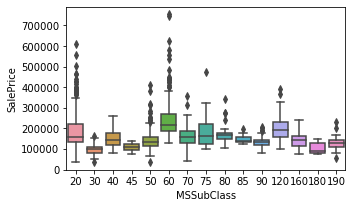

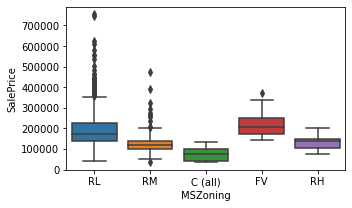

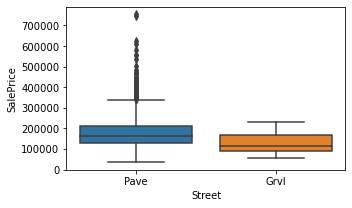

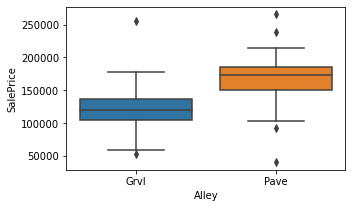

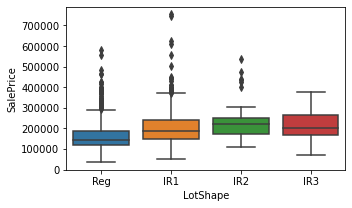

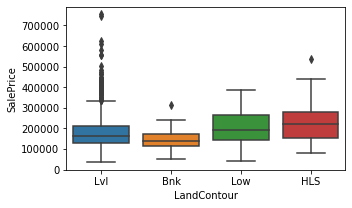

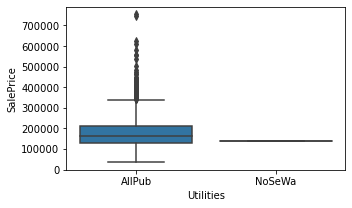

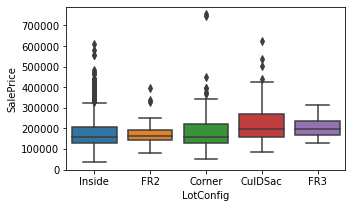

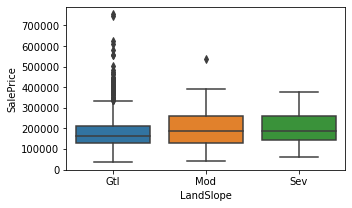

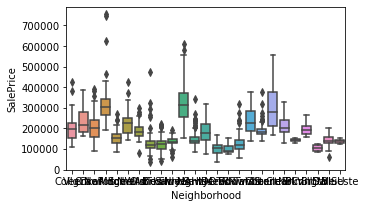

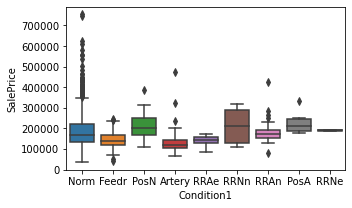

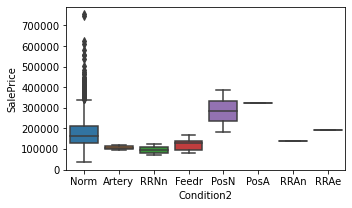

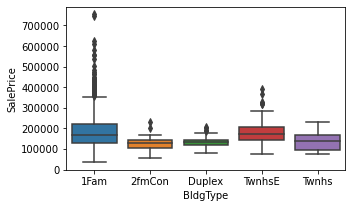

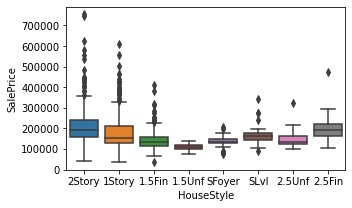

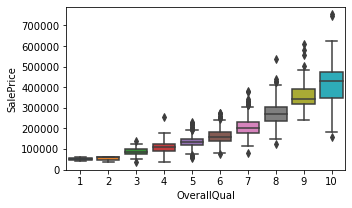

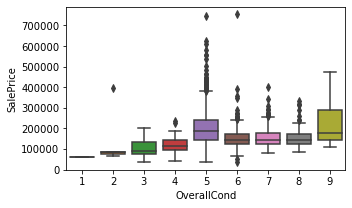

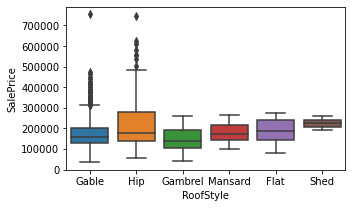

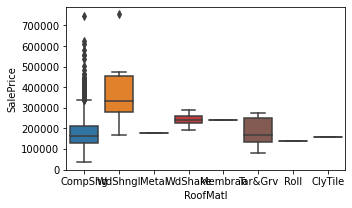

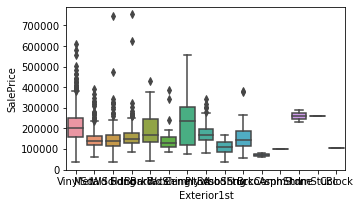

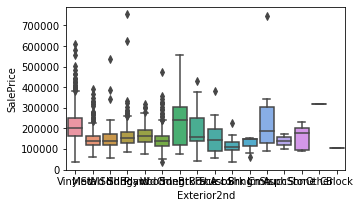

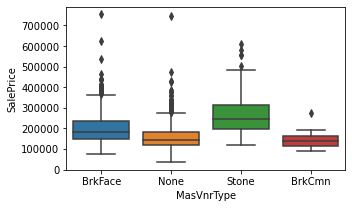

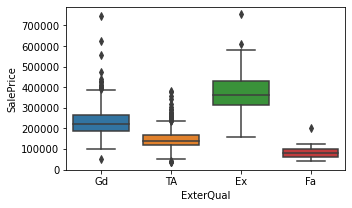

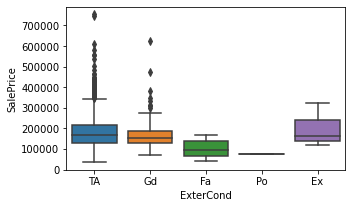

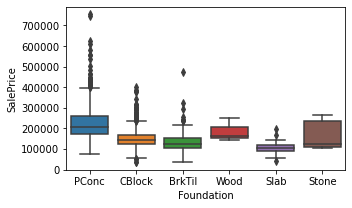

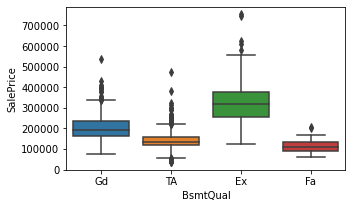

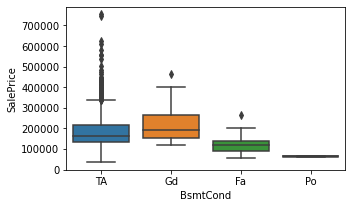

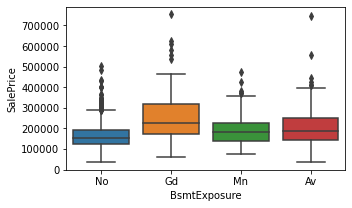

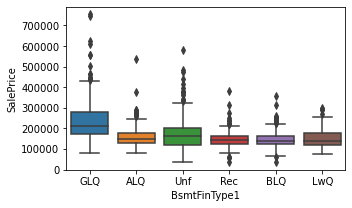

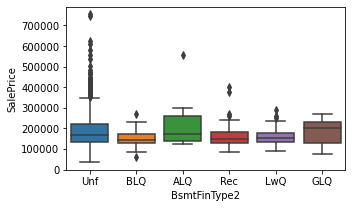

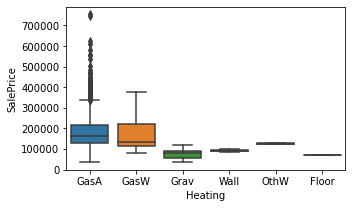

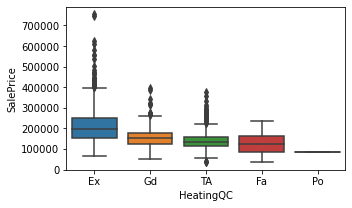

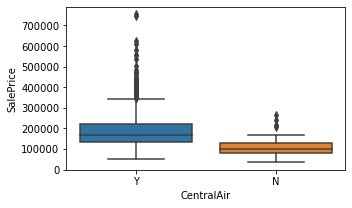

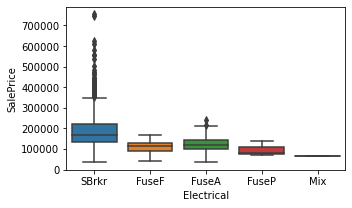

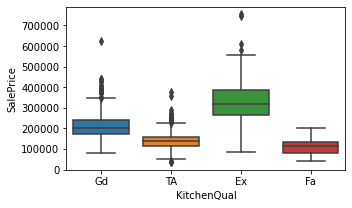

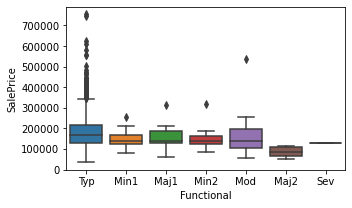

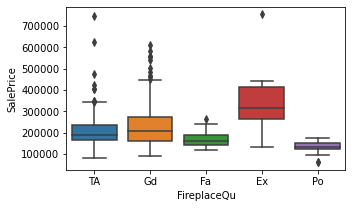

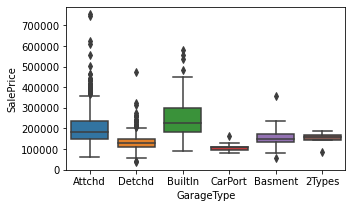

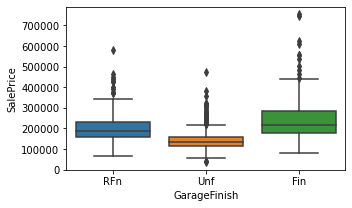

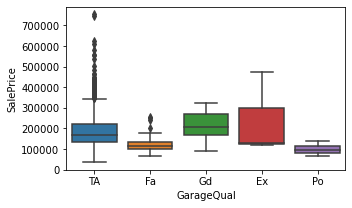

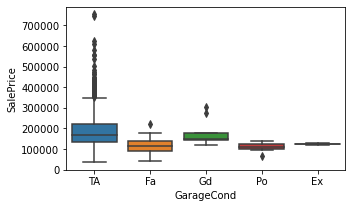

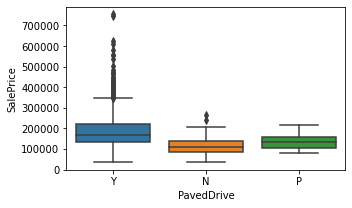

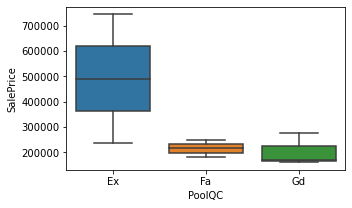

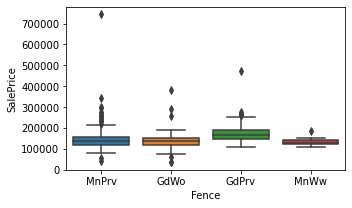

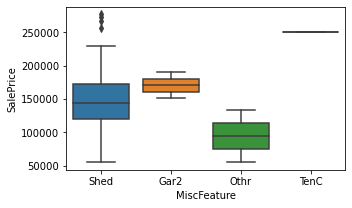

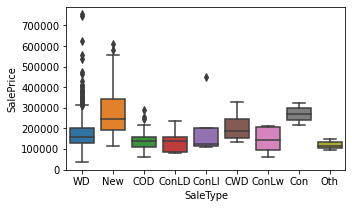

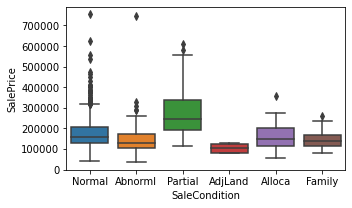

In [1372]:
for i in house_category.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x = i, y = 'SalePrice', data = house)




In [1373]:
for i in house_category.columns:
    if(list(house_category[i].value_counts())[0] > (len(house_category)*90)/100):
        house_category = house_category.drop([i], axis=1)
       

In [1374]:
house_category.shape

(1460, 32)

In [1375]:
house_category.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,Fence,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,...,Unf,Ex,Gd,No_FireplaceQu,Attchd,RFn,TA,No_Fence,WD,Normal
1,20,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,...,Unf,Ex,TA,TA,Attchd,RFn,TA,No_Fence,WD,Normal
2,60,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,...,Unf,Ex,Gd,TA,Attchd,RFn,TA,No_Fence,WD,Normal
3,70,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,...,Unf,Gd,Gd,Gd,Detchd,Unf,TA,No_Fence,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,...,Unf,Ex,Gd,TA,Attchd,RFn,TA,No_Fence,WD,Normal


In [1376]:
house_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,706,150,856,856,1710,2,...,1,8,0,2003.0,2,548,61,2,2008,208500
1,80.0,9600,1976,1976,978,284,1262,1262,1262,2,...,1,6,1,1976.0,2,460,0,5,2007,181500
2,68.0,11250,2001,2002,486,434,920,920,1786,2,...,1,6,1,2001.0,2,608,42,9,2008,223500
3,60.0,9550,1915,1970,216,540,756,961,1717,1,...,1,7,1,1998.0,3,642,35,2,2006,140000
4,84.0,14260,2000,2000,655,490,1145,1145,2198,2,...,1,9,1,2000.0,3,836,84,12,2008,250000


In [1377]:
#house_numeric = house_numeric.drop(["Id"], axis=1)


#### Impute null values

In [1378]:
for i in house_numeric.columns:
    if(house_numeric[i].isnull().sum()):
        print(i, "=" , house_numeric[i].isnull().sum())


LotFrontage = 259
GarageYrBlt = 81


In [1379]:
house_numeric["LotFrontage"] = house_numeric["LotFrontage"].fillna(0)

In [1382]:
# There are some missing values for column "GarageYrBlt". I am imputing it "YearBuilt"
for i in house_numeric.index:
        if (pd.isnull(house_numeric["GarageYrBlt"][i])):
            house_numeric["GarageYrBlt"][i] = house_numeric["YearBuilt"][i]

In [1383]:
for i in house_numeric.columns:
    if(house_numeric[i].isnull().sum()):
        print(i, "=" , house_numeric[i].isnull().sum())

### Dummy encoding for categorical variables

In [1384]:
for i in house_category.columns:
    house_category[i] = house_category[i].apply(lambda x: i+str(x))
    temp = pd.get_dummies(house_category[i], drop_first=True)
    house_category = pd.concat([house_category,temp], axis=1)
    house_category = house_category.drop([i], axis=1)


In [1385]:
house_category.shape

(1460, 205)

#### Analyzing numeric columns for outliers

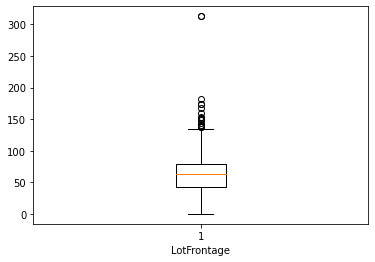

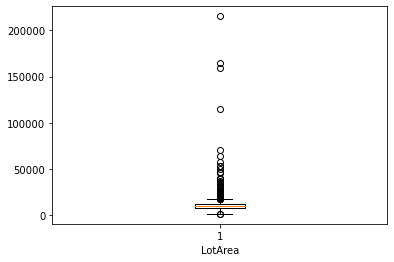

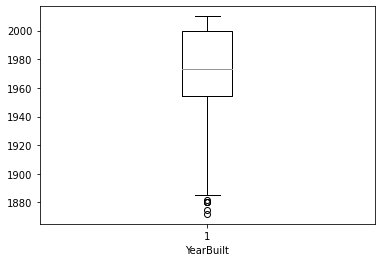

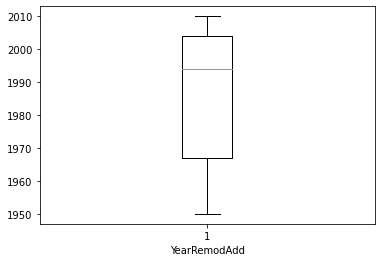

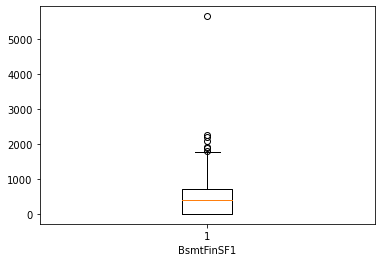

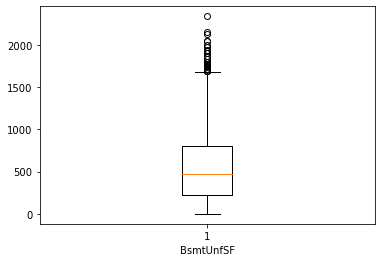

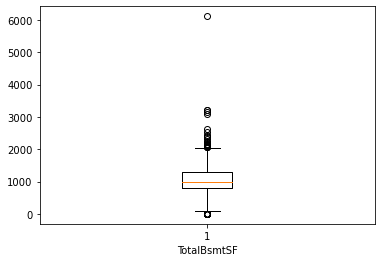

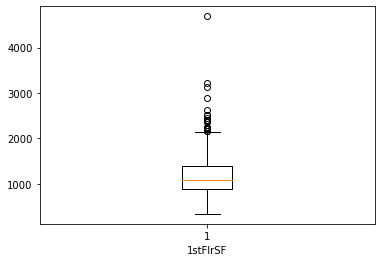

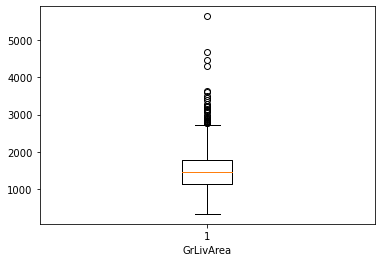

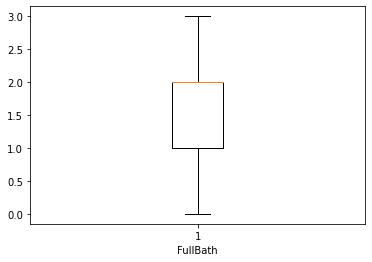

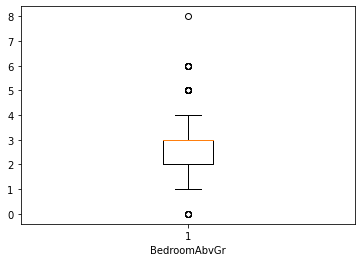

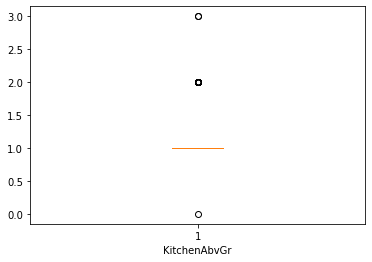

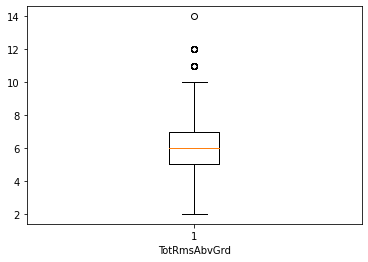

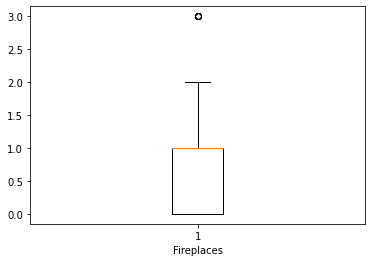

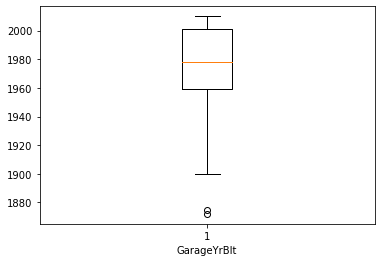

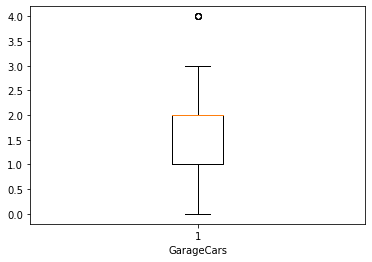

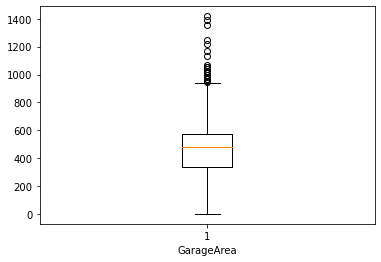

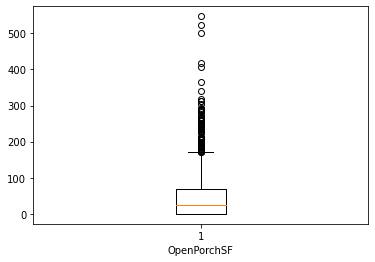

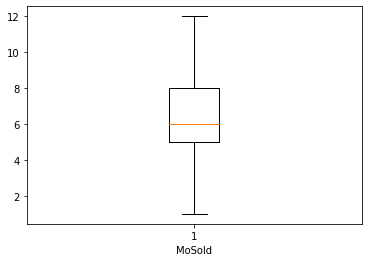

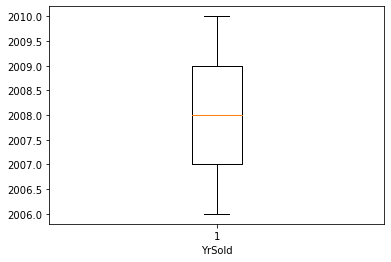

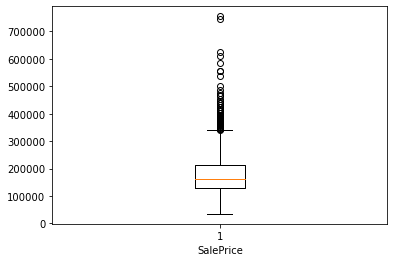

In [1386]:
for i in house_numeric.columns:
    plt.boxplot(house_numeric[i])
    plt.xlabel(i)
    plt.show()
    

In [1387]:
# 1stFlrSF, SalePrice, OpenPorchSF, GarageArea, GarageCars, GarageYrBlt, KitchenAbvGr, GrLivArea, TotalBsmtSF, BsmtUnfSF, BsmtFinSF1, LotArea, LotFrontage

(house_numeric["1stFlrSF"] > 1600).sum()

202

In [1388]:

house_new = pd.concat([house_category,house_numeric], axis=1)
house_new.shape

(1460, 226)

In [1389]:
cols = ["1stFlrSF", "SalePrice", "OpenPorchSF", "GarageArea", "GarageYrBlt", "KitchenAbvGr", "GrLivArea", "TotalBsmtSF", "BsmtUnfSF", "BsmtFinSF1", "LotArea", "LotFrontage"]

for i in cols:
    count = list(house_new[i].value_counts())[1]
    if(count > 1):
        print(i, "= ", count)


1stFlrSF =  16
SalePrice =  17
OpenPorchSF =  29
GarageArea =  49
GarageYrBlt =  60
KitchenAbvGr =  65
GrLivArea =  14
TotalBsmtSF =  35
BsmtUnfSF =  9
BsmtFinSF1 =  12
LotArea =  24
LotFrontage =  143


<AxesSubplot:ylabel='SalePrice'>

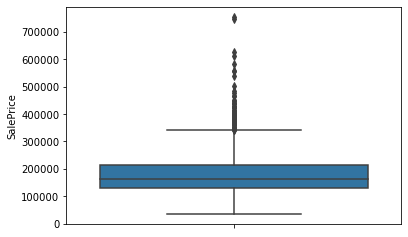

In [1390]:
sns.boxplot(y='SalePrice', data=house)

In [1391]:
#count = list(house_new["SalePrice"].value_counts())[1]
(house_new["SalePrice"] > 100000).sum()

house_filtered = house_new[house_new["SalePrice"] < 300000]

In [1392]:
for i in house_filtered.columns:
    if(house_filtered[i].isnull().sum()):
        print(i, "=" , house_filtered[i].isnull().sum())

In [1393]:
house_filtered.shape

(1345, 226)

<AxesSubplot:ylabel='SalePrice'>

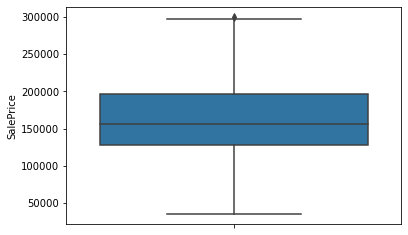

In [1394]:
sns.boxplot(y='SalePrice', data=house_filtered)

In [1395]:
house_filtered.shape

(1345, 226)

In [1396]:
#list(house_numeric["GrLivArea"].value_counts())

<AxesSubplot:>

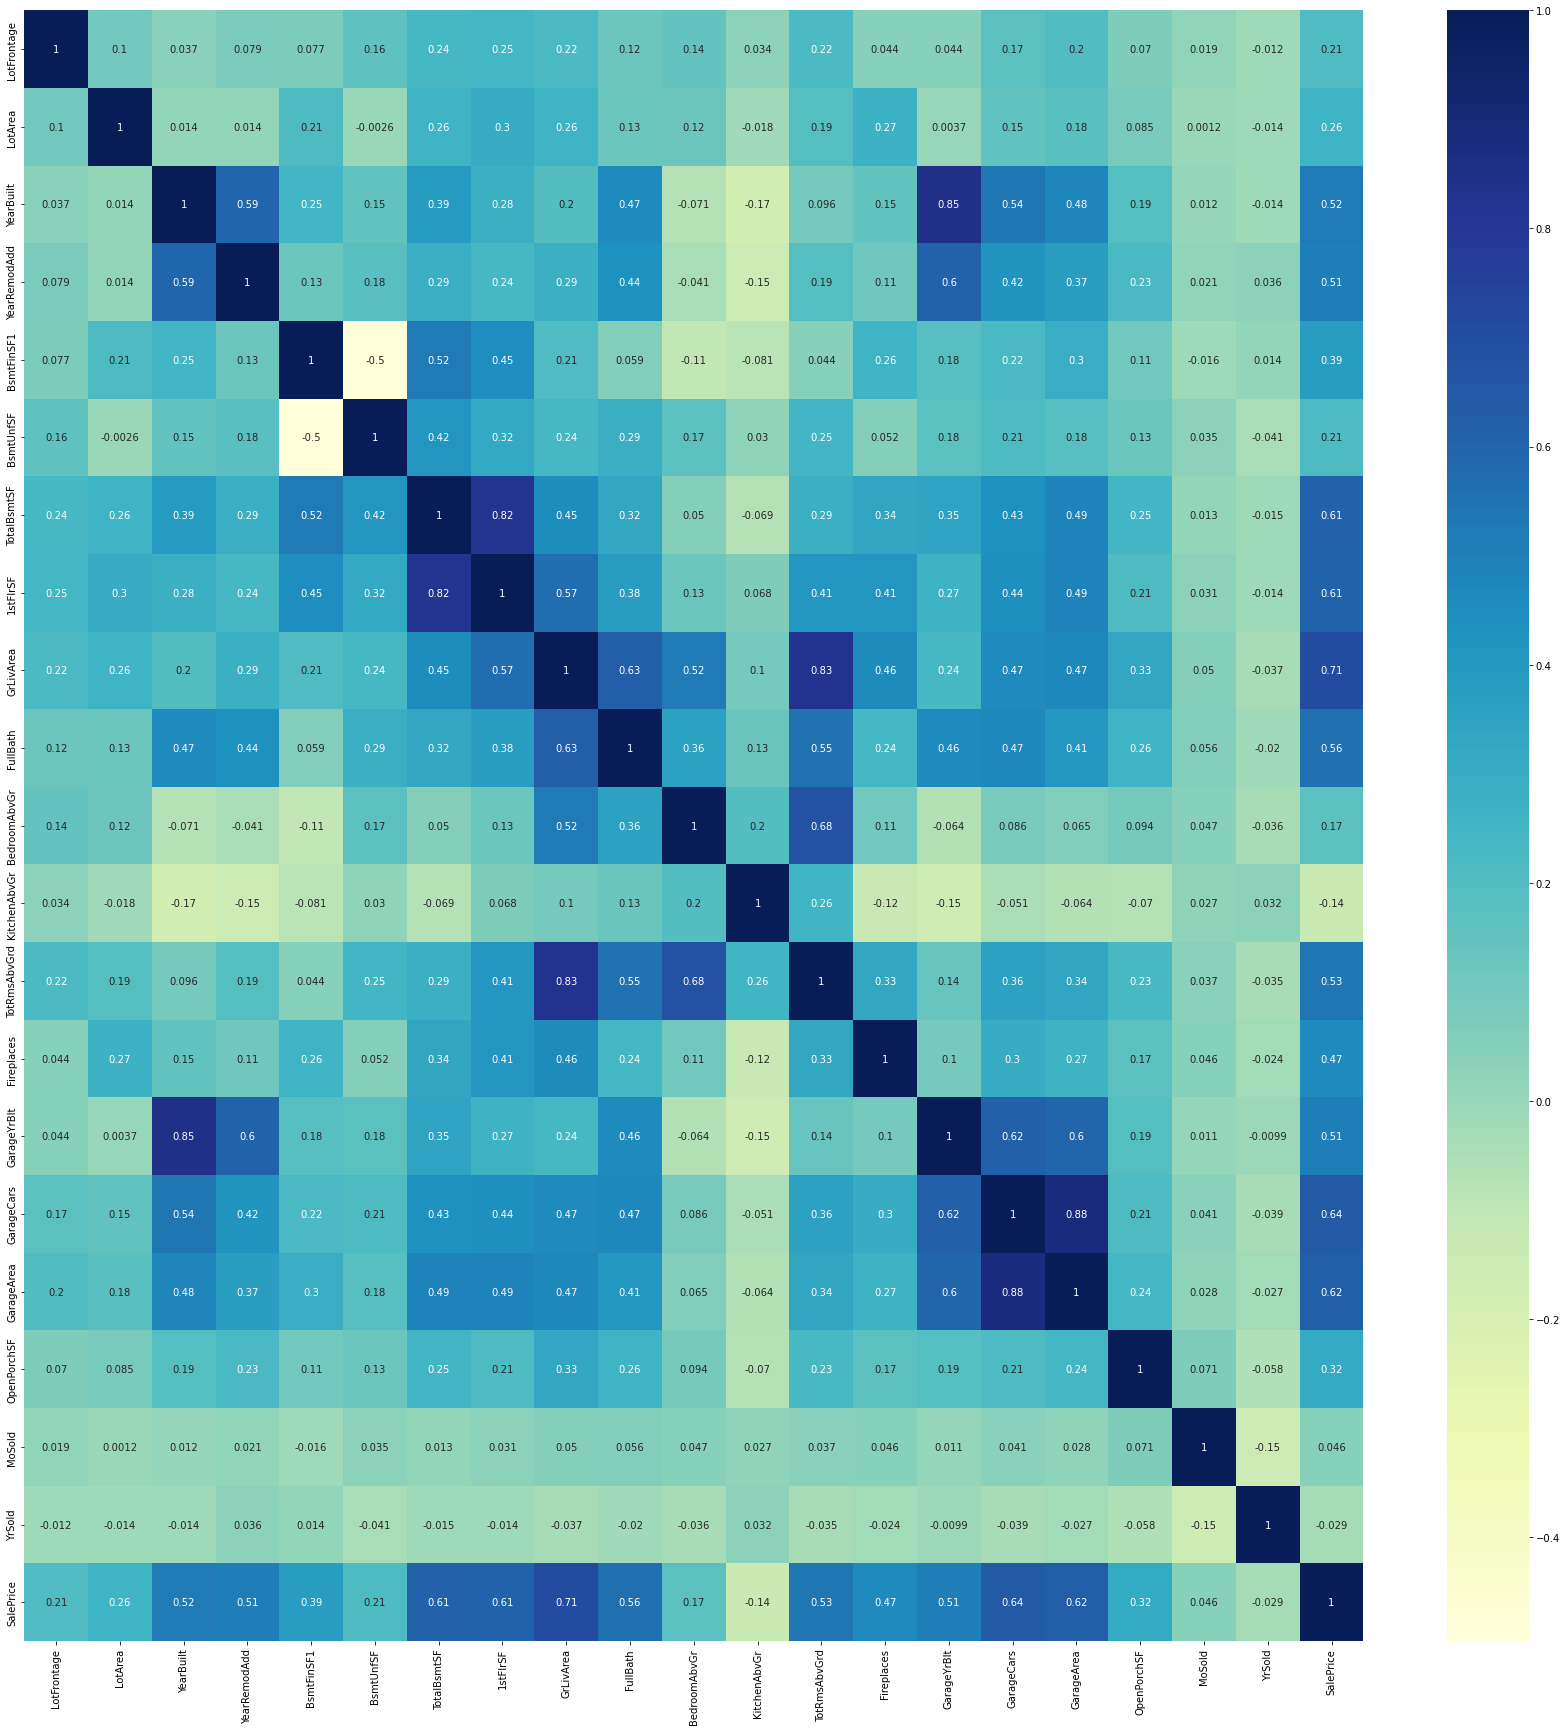

In [1397]:
plt.figure(figsize=(30,30))
sns.heatmap(house_numeric.corr(), annot=True, cmap='YlGnBu')

In [1398]:
house_backup = house_filtered

In [1399]:
house_backup.shape

(1345, 226)

### Splitting the Data into Training and Testing Sets

In [1400]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols =house_backup.columns
y = house_backup.pop('SalePrice')
X = house_backup

X.columns

Index(['MSSubClass160', 'MSSubClass180', 'MSSubClass190', 'MSSubClass20',
       'MSSubClass30', 'MSSubClass40', 'MSSubClass45', 'MSSubClass50',
       'MSSubClass60', 'MSSubClass70',
       ...
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'MoSold',
       'YrSold'],
      dtype='object', length=225)

In [1401]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns
X.head()


,MSSubClass160,MSSubClass180,MSSubClass190,MSSubClass20,MSSubClass30,MSSubClass40,MSSubClass45,MSSubClass50,MSSubClass60,MSSubClass70,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MoSold,YrSold
0,-0.22168,-0.086548,-0.151042,-0.753392,-0.232541,-0.054615,-0.09488,-0.340856,2.103185,-0.212288,...,0.184223,-0.22073,1.088758,-0.895316,1.086805,0.450930,0.500745,0.280641,-1.593600,0.136015
1,-0.22168,-0.086548,-0.151042,1.327331,-0.232541,-0.054615,-0.09488,-0.340856,-0.475469,-0.212288,...,0.184223,-0.22073,-0.233481,0.701767,0.055384,0.450930,0.059361,-0.673572,-0.479571,-0.616826
2,-0.22168,-0.086548,-0.151042,-0.753392,-0.232541,-0.054615,-0.09488,-0.340856,2.103185,-0.212288,...,0.184223,-0.22073,-0.233481,0.701767,1.010404,0.450930,0.801689,-0.016573,1.005801,0.136015
3,-0.22168,-0.086548,-0.151042,-0.753392,-0.232541,-0.054615,-0.09488,-0.340856,-0.475469,4.710590,...,0.184223,-0.22073,0.427638,0.701767,0.895801,1.867987,0.972224,-0.126073,-1.593600,-1.369667
4,-0.22168,-0.086548,-0.151042,-0.753392,-0.232541,-0.054615,-0.09488,-0.340856,2.103185,-0.212288,...,1.429345,-0.22073,1.749877,0.701767,0.972203,1.867987,1.945276,0.640426,2.119830,0.136015


### Test-Train split

In [1403]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Linear regression

In [1404]:
from sklearn.linear_model import LinearRegression
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [1405]:
print(lm.intercept_)
print(lm.coef_)

103052799260351.94
[-5.08838853e+03  3.73894728e+02 -1.62949943e+03 -6.69097774e+02
 -9.79623424e+02  5.23045675e+02  9.13299158e+02  1.90695690e+03
 -1.95595116e+03 -1.32165294e+03 -3.26883378e+02  1.13862655e+03
  7.18020879e+02  5.09665992e+15  1.20509982e+04  7.00695755e+03
  2.17617750e+04  1.44394459e+04  2.77464746e+02 -1.53564098e+02
  3.32282223e+02  9.63240151e+02  1.20442300e+03  1.69891889e+03
  1.96099967e+03 -1.28637494e+03  2.40558990e+02 -3.18909255e+02
  5.27754128e+02  2.63410798e+03  2.47657655e+03 -2.96781707e+02
  5.96975754e+02  5.03303368e+03 -8.45105835e+02 -9.34244586e+02
  1.88352886e+03 -1.15631316e+03 -8.70188268e+02 -1.67707682e+03
 -2.45476343e+02 -1.15549876e+03  1.37138370e+03  1.64013649e+03
 -1.32287309e+01 -1.46703273e+02 -6.24624669e+02  8.97326609e+02
  1.74540762e+03  1.28407279e+03  3.55102511e+02  1.43330862e+03
  1.01409152e+03  3.37832383e+03  1.25070418e+01  2.00994037e+03
 -7.86069210e+02  6.89595488e+02 -1.79716752e+02  4.88550417e+02
  9.29

In [1406]:
from sklearn.metrics import r2_score, mean_squared_error

In [1407]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)


In [1408]:

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9241045084235916
-7.715453158505303e+21
189413731158.02002
8.847593658528296e+33
201289831.19874603
2.189998430328786e+31


### Ridge Regression

In [1409]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1410]:
print(model_cv.best_params_)

{'alpha': 100}


In [1411]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.70323868e+03 -5.07259199e+00 -6.15604109e+02  7.10449827e+00
 -1.31351775e+03  6.60268686e+02  3.56077143e+02  1.02635865e+03
  2.15503141e+03  2.19760111e+02  8.03608244e+02  1.27715803e+02
 -2.10514790e+02 -4.13154374e+02  1.90585074e+03  1.64630251e+03
  2.86369822e+03 -3.85939016e+02  1.98754062e+02 -1.66247426e+01
 -2.46072691e+02  3.31174459e+02  4.59056968e+02  9.17110410e+02
  1.67580785e+03 -1.10304104e+03 -7.51038757e+01 -7.96276859e+02
  2.42354470e+02  1.22010069e+03  1.05112841e+03  6.97892626e+02
  3.21316294e+02  4.08140168e+03 -1.11772785e+03 -9.63829049e+02
 -1.32338738e+03 -2.01179047e+03 -8.12330939e+02 -1.61135254e+03
 -2.85904192e+02 -7.26497018e+02  1.58380910e+03  1.99940408e+03
 -1.47423874e+03 -5.94192431e+02 -8.35499118e+02  6.70135647e+02
  2.28978782e+03  1.87069308e+03  7.14342134e+02  1.64060374e+03
 -1.13959959e+02  2.13657501e+03 -1.94399903e-01  1.30024587e+03
 -9.91640045e+02 -8.22501494e+01 -3.53743188e+02  3.80848244e+02
 -8.48240148e+01 -4.13154

In [1412]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9110360633769774
0.9012962096511383
222028882404.79266
113187263485.69733
235949928.16662344
280166493.7764785


### Lasso Regression

In [1413]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1414]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [1415]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [1416]:
lasso.coef_

array([-2.72527627e+03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -3.09662659e+02,  5.34159045e+01,  0.00000000e+00, -0.00000000e+00,
        1.00661833e+03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.51549830e+02,  9.76652497e+02,  1.07502857e+03,
        3.32450262e+03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  2.54229386e+02,  0.00000000e+00,
        1.73206374e+03, -2.83644425e+02,  0.00000000e+00, -1.45598449e+02,
        0.00000000e+00,  1.73030195e+02,  1.14903287e+03,  4.20394881e+02,
        5.12161018e+02,  3.96541941e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -1.52074640e+03, -2.05902909e+02, -2.66987558e+02,
        0.00000000e+00, -0.00000000e+00,  2.11876872e+02,  1.38705840e+03,
       -4.74862672e+02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.46784728e+03,  7.00596176e+02,  3.25894550e+02,  1.22508233e+03,
       -0.00000000e+00,  

In [1417]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9047144110691048
0.9042223459377274
237805942752.47333
109831755478.40985
252716198.46171448
271860780.8871531


In [1418]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.241045e-01,9.110361e-01,9.047144e-01
1,R2 Score (Test),-7.715453e+21,9.012962e-01,9.042223e-01
2,RSS (Train),1.894137e+11,2.220289e+11,2.378059e+11
3,RSS (Test),8.847594e+33,1.131873e+11,1.098318e+11
4,MSE (Train),1.418766e+04,1.536066e+04,1.589705e+04
5,MSE (Test),4.679742e+15,1.673817e+04,1.648820e+04


### RFE (Recursive Feature Elimination)

In [1419]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1420]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1421]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass160', True, 1),
 ('MSSubClass180', False, 118),
 ('MSSubClass190', False, 64),
 ('MSSubClass20', False, 34),
 ('MSSubClass30', False, 35),
 ('MSSubClass40', False, 126),
 ('MSSubClass45', False, 117),
 ('MSSubClass50', False, 129),
 ('MSSubClass60', False, 46),
 ('MSSubClass70', False, 50),
 ('MSSubClass75', False, 72),
 ('MSSubClass80', False, 119),
 ('MSSubClass85', False, 174),
 ('MSSubClass90', True, 1),
 ('MSZoningFV', True, 1),
 ('MSZoningRH', True, 1),
 ('MSZoningRL', True, 1),
 ('MSZoningRM', True, 1),
 ('LotShapeIR2', False, 139),
 ('LotShapeIR3', False, 158),
 ('LotShapeReg', False, 132),
 ('LandContourHLS', False, 89),
 ('LandContourLow', False, 70),
 ('LandContourLvl', False, 69),
 ('LotConfigCulDSac', False, 4),
 ('LotConfigFR2', False, 67),
 ('LotConfigFR3', False, 142),
 ('LotConfigInside', False, 127),
 ('NeighborhoodBlueste', False, 97),
 ('NeighborhoodBrDale', False, 23),
 ('NeighborhoodBrkSide', False, 9),
 ('NeighborhoodClearCr', False, 141),
 ('Neighbo

In [1422]:
lm_col = X_train.columns[rfe.support_]
lm_col

Index(['MSSubClass160', 'MSSubClass90', 'MSZoningFV', 'MSZoningRH',
       'MSZoningRL', 'MSZoningRM', 'NeighborhoodCrawfor', 'BldgTypeDuplex',
       'OverallQual10', 'OverallQual7', 'OverallQual8', 'OverallCond2',
       'OverallCond3', 'OverallCond4', 'OverallCond5', 'OverallCond6',
       'OverallCond7', 'OverallCond8', 'OverallCond9', 'Exterior1stCBlock',
       'Exterior1stWd Sdng', 'Exterior2ndCBlock', 'Exterior2ndOther',
       'FoundationPConc', 'BsmtQualNo_BsmtQual', 'BsmtCondNo_BsmtCond',
       'BsmtCondPo', 'BsmtExposureGd', 'BsmtExposureNo_BsmtExposure',
       'BsmtFinType1No_BsmtFinType1', 'BsmtFinType2No_BsmtFinType2',
       'KitchenQualFa', 'KitchenQualGd', 'KitchenQualTA',
       'FireplaceQuNo_FireplaceQu', 'GarageTypeNo_GarageType',
       'GarageFinishNo_GarageFinish', 'GarageQualFa',
       'GarageQualNo_GarageQual', 'GarageQualTA', 'SaleTypeNew',
       'SaleConditionNormal', 'LotArea', 'YearBuilt', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'K

In [1423]:
X_train_rfe = X_train[lm_col]


X_test_rfe = X_test[lm_col]

In [1424]:
X_test_rfe.shape

(404, 50)

In [1425]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [1426]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

252468731974586.1
[-4.14165476e+03  2.19411257e+16  1.05399935e+04  4.32889937e+03
  1.63866977e+04  1.11276117e+04  4.28623000e+03 -2.19411257e+16
 -1.24983329e+04  5.51325000e+03  9.59137500e+03 -3.66352270e+12
 -9.08681052e+12 -1.35534501e+13 -3.35516922e+13 -2.60905753e+13
 -2.40355078e+13 -1.48424086e+13 -7.73083165e+12  1.91450924e+17
  1.07050000e+03 -1.91450924e+17 -1.48498610e+15  3.17150000e+03
 -5.06378367e+16 -4.06053519e+16 -4.13889244e+15  3.03000000e+03
  3.76596881e+16  5.76270966e+14  5.41891590e+16 -1.58425000e+03
  1.01000000e+03 -1.44350000e+03 -4.01200000e+03  5.66341427e+15
 -3.69094120e+15  7.14500000e+02 -1.97247307e+15  2.38750000e+02
  3.28800000e+03  3.47500000e+03  2.94000000e+03  1.20855000e+04
 -5.42800000e+03  1.51220000e+04 -4.42400000e+03  2.22625000e+04
 -4.37600000e+03  8.46000000e+03]


In [1427]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8770016272588186
-1.5842841400808697e+23
306969231285.8535
1.816756841512853e+35
326215973.7362949
4.496922875031814e+32


### Ridge Regression

In [1428]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1429]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.2}


In [1430]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ -4134.13406802   -536.30051957   7448.05101564   3502.88716735
  10647.78604681   6034.3951044    4510.98563113   -536.30051958
 -13455.02314697   6026.54285908   9055.86109007   -983.96339455
  -3357.8418172   -2300.09150165  -2611.27995347    141.90790046
   4117.57737845   2290.74861313   2099.7912011    -293.03872956
   -736.37836352   -293.03872956      0.           2844.07695591
    298.38640375    298.38640375      0.           2920.96797853
    294.54670724    298.38640375    294.54670724  -5702.29560554
 -10945.83944886 -14258.12502305  -3465.354133    -1078.22142081
  -1078.22142083  -3597.51798295  -1078.22142082  -5379.40486647
   3469.19337633   3199.29989887   2601.67250703  12036.89249936
  -5369.01493314  13024.92623367  -2707.26485948  22822.66318087
  -3510.54564841   6553.11841616]


In [1431]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.8879945533259884
0.8933987425989027
279533989752.03186
122243579164.67581
297060562.9670902
302583116.7442471


### Double the value of alpha for ridge

In [1432]:
alpha = 0.2*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ -4129.94042321   -536.22912766   7403.51084148   3480.44078087
  10563.03668741   5957.73106143   4509.08369359   -536.22912766
 -13444.00125869   6027.37257047   9059.84923964   -987.74691305
  -3358.47731191  -2303.37472576  -2609.53338514    142.33239114
   4117.61941163   2290.55597994   2099.31362823   -293.02538212
   -736.25671874   -293.02538212      0.           2848.66917781
    296.45962693    296.45962693      0.           2919.86401421
    292.64472459    296.45962693    292.64472459  -5683.00558972
 -10885.0294232  -14198.24017611  -3468.63953371  -1073.03691566
  -1073.03691566  -3582.28888608  -1073.03691566  -5358.768637
   3470.46080004   3202.13045232   2603.13799151  12033.91695222
  -5365.12131184  13001.26824366  -2682.21338939  22809.19218025
  -3508.67574834   6551.10022206]


In [1433]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric7 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric7.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric7.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric7.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric7.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric7.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric7.append(mse_test_lr**0.5)

0.8879934906435298
0.8934446230863902
279536641907.5858
122190966323.69229
297063381.4108245
302452886.9398324


### Lasso Regression

In [1434]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1435]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1436]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
print(ridge.coef_)

[ -4129.94042321   -536.22912766   7403.51084148   3480.44078087
  10563.03668741   5957.73106143   4509.08369359   -536.22912766
 -13444.00125869   6027.37257047   9059.84923964   -987.74691305
  -3358.47731191  -2303.37472576  -2609.53338514    142.33239114
   4117.61941163   2290.55597994   2099.31362823   -293.02538212
   -736.25671874   -293.02538212      0.           2848.66917781
    296.45962693    296.45962693      0.           2919.86401421
    292.64472459    296.45962693    292.64472459  -5683.00558972
 -10885.0294232  -14198.24017611  -3468.63953371  -1073.03691566
  -1073.03691566  -3582.28888608  -1073.03691566  -5358.768637
   3470.46080004   3202.13045232   2603.13799151  12033.91695222
  -5365.12131184  13001.26824366  -2682.21338939  22809.19218025
  -3508.67574834   6551.10022206]


In [1437]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric6.append(mse_test_lr**0.5)

0.8879949130845818
0.8930309254053614
279533091896.0977
122665368656.77919
297059608.8162569
303627150.14054257


### Double the value of alpha for lasso

In [1438]:
alpha =0.0001*2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0002)

In [1439]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric8 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric8.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric8.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric8.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric8.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric8.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric8.append(mse_test_lr**0.5)

0.8879949130845781
0.8930309411578974
279533091896.1068
122665350592.76736
297059608.81626654
303627105.427642


In [1440]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric4
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric5, name = 'Ridge Regression')
ls_metric = pd.Series(metric6, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.770016e-01,8.879946e-01,8.879949e-01
1,R2 Score (Test),-1.584284e+23,8.933987e-01,8.930309e-01
2,RSS (Train),3.069692e+11,2.795340e+11,2.795331e+11
3,RSS (Test),1.816757e+35,1.222436e+11,1.226654e+11
4,MSE (Train),1.806145e+04,1.723544e+04,1.723542e+04
5,MSE (Test),2.120595e+16,1.739492e+04,1.742490e+04


### Metrics with double the alpha value for ridge and lasso

In [1441]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric4
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric7, name = 'Ridge Regression')
ls_metric = pd.Series(metric8, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.770016e-01,8.879935e-01,8.879949e-01
1,R2 Score (Test),-1.584284e+23,8.934446e-01,8.930309e-01
2,RSS (Train),3.069692e+11,2.795366e+11,2.795331e+11
3,RSS (Test),1.816757e+35,1.221910e+11,1.226654e+11
4,MSE (Train),1.806145e+04,1.723553e+04,1.723542e+04
5,MSE (Test),2.120595e+16,1.739117e+04,1.742490e+04
